In [ ]:
!pip install h5netcdf

In [1]:
# Check API is available
import requests
response = requests.get("http://host.docker.internal:8080/argo-toolbox/api/decoder/docs/", timeout=5)
if(response.status_code == 200):
    print("✅ Decoder API available")

✅ Decoder API available


In [3]:
from pathlib import Path
file_dir = r"mockfiles_6903014"

files = [("files", (str(Path(file_path).name), open(file_path, "rb"), "text/plain")) for file_path in Path(file_dir).glob("*.txt")]
print(files)

[('files', ('co_20190527T085814Z_300234068508780_000000_000000_18145.txt', <_io.BufferedReader name='mockfiles_6903014/co_20190527T085814Z_300234068508780_000000_000000_18145.txt'>, 'text/plain')), ('files', ('co_20190527T085840Z_300234068508780_000001_000000_18220.txt', <_io.BufferedReader name='mockfiles_6903014/co_20190527T085840Z_300234068508780_000001_000000_18220.txt'>, 'text/plain')), ('files', ('co_20190527T090327Z_300234068508780_000002_000001_20618.txt', <_io.BufferedReader name='mockfiles_6903014/co_20190527T090327Z_300234068508780_000002_000001_20618.txt'>, 'text/plain')), ('files', ('co_20190527T090349Z_300234068508780_000003_000000_20696.txt', <_io.BufferedReader name='mockfiles_6903014/co_20190527T090349Z_300234068508780_000003_000000_20696.txt'>, 'text/plain')), ('files', ('co_20190527T090440Z_300234068508780_000004_000000_20795.txt', <_io.BufferedReader name='mockfiles_6903014/co_20190527T090440Z_300234068508780_000004_000000_20795.txt'>, 'text/plain'))]


In [4]:
import json
float_info = r"mockfiles_6903014/info_json.json"
meta_info = r"mockfiles_6903014/meta_info.json"
with open(float_info) as file:
   float_info = json.loads(file.read())

with open(meta_info) as file:
   meta_info = json.loads(file.read())

# Example Extra args, used to pass to the decoder and overwrite the default configuration.
extra_args = {"DIR_OUTPUT_XML_FILE" : "/mnt/data/output/xml/",}

meta_data = {
    "float_metadata": json.dumps({
        "float_info": float_info,
        "float_meta_info": meta_info,
    }),
     "configuration_override": json.dumps(extra_args),  # optional
}

In [5]:
from IPython.display import display
DECODER_URL = "http://host.docker.internal:8080/argo-toolbox/api/decoder/decode_float"

wmonum = "6903014"
url = f"{DECODER_URL}/{wmonum}"
print(url)
handle = display("⏳ Decoding…", display_id=True)
response = requests.post(
            url,
            files=files,
            data=meta_data
        )
handle.update(f"✅ Done (status {response.status_code})")
for _, (name, file_obj, _) in files:
    file_obj.close()

http://host.docker.internal:8080/argo-toolbox/api/decoder/decode_float/6903014


'✅ Done (status 200)'

In [6]:
dir = Path("output") / wmonum
dir.mkdir(parents=True, exist_ok=True)
open(dir / f"{wmonum}.zip", "wb").write(response.content)

290154

In [7]:
from zipfile import ZipFile
print(dir)
with ZipFile(dir / f"{wmonum}.zip", "r") as zObject:
    zObject.extractall(path= dir / "unzipped")

output/6903014


In [8]:
import numpy as np
import netCDF4 as nc
import h5netcdf
import xarray as xr
import matplotlib.pyplot as plt

In [ ]:
ds = xr.open_dataset("output/6903014/unzipped/mnt/data/output/nc/6902892/profiles/R6902892_031.nc")

In [11]:
ds

<xarray.Dataset> Size: 3kB
Dimensions:                       (N_PROF: 1, N_PARAM: 4, N_LEVELS: 21,
                                   N_HISTORY: 1, N_CALIB: 1)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_HISTORY, N_CALIB
Data variables: (12/67)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object 8B ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object 32B ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object 32B ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object 32B ...
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object 32B ...
    SCIENTIFIC_CALIB_DATE         (N_PROF, N_CALIB, N_PARAM) object 32B ...
Attributes:
    title:                Argo float vertical profile
    institution:          CORIOLIS
    source:               Argo float
    history:              2025-11-18T14:50:20Z creation; 2025-11-18T14:50:20Z...
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile
    decoder_version:      CODA_067a
    id:                   https://doi.org/10.17882/42182

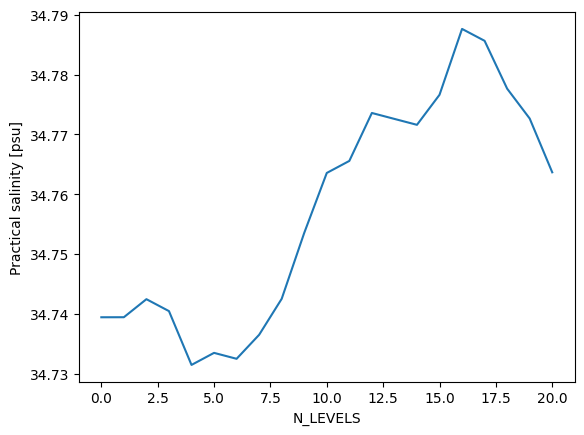

In [13]:
ds.PSAL_ADJUSTED.plot()

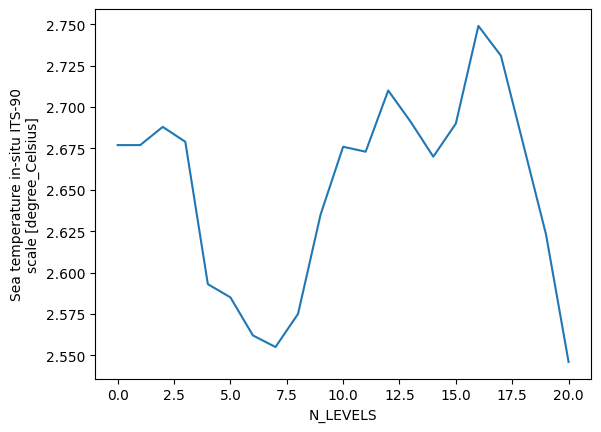

In [14]:
ds.TEMP.plot()